#  Medical Imaging 
##  Practical session 4
### Image Processing: Image Segmentation
### 28th November 2023
***
**Sebastian Amador Sanchez (sebastian.amador.sanchez@vub.be), Jef Vandemeulebroucke\
Department of Electronics and Informatics (ETRO)\
Vrije Universitet Brussel, Pleinlaan 2, B-1050 Brussels, Belgium**

<font color=blue>Insert students names and IDs here</font>

César Zapata <br>
02213600

## Instructions
The jupyter notebook should be submitted as the report individually or by teams of two using the assignment functionality of Ufora.

Please complete this notebook and upload the following before the deadline **11th December, 2023, at 23:59**:
- the notebook in *.ipynb* format
- the executed notebook in *.html* format (File --> Download As --> HTML)

The report should contain concise answers to the questions (in specified cells), python code and plotted figures. For this practical session, **we do not** require a separate written report in *.pdf* format.

## Introduction
The goal of this exercise session is to obtain insight in the image segmentation operations and their evaluation metrics commonly applied in medical image processing. For more information on the following concepts see the lecture recordings, course slides and the related study material.

### BraTS dataset
You will be working with images from the [*Brain Tumor Segmentation (BRATS) Challenge*](http://www.braintumorsegmentation.org), which contains scans of multiple glioma cases. Gliomas are a type of brain tumor originating in the glial cells surrounding the neurons. They are characterized by having various heterogeneous histological subregions. Therefore, they have varying intensity profiles, and multimodal MRI scans must be employed to visualize them properly.

<img src="./images/brats.png" alt="drawing" width="800"/>

**(A)** Whole tumor visible in T2-FLAIR **(B)** Tumor core visible in T2 **(C)** Tumor (blue) and necrotic component (green) visible in T1-Contrast **(D)** Tumor sub-regions.

You DO NOT have to download the dataset, you have to employ the images acquired in the previous session. If you were not able to obtain them, these are provided within the files. 

#### Questions:  [sebastian.amador.sanchez@vub.be](mailto:sebastian.amador.sanchez@vub.be)

### Required modules
Before starting make sure you have installed the following libraries:

- ```SimpleITK``` -> Read and write images, image operations
- ```numpy``` -> Operation with arrays
- ```matplotlib``` -> Plot images

# 1. Image segmentation
Image segmentation can be defined as any method that results in partitioning an image into meaningful regions. This is done by defining the boundaries of a region of interest, known as foreground, with similar characteristics, such as shape, color, or texture. The remaining image volume is known as the background.

<img src="./images/segmentations.png" alt="drawing" width="600"/>

**Left:** Retinal blood vessel segmentation. **Center.** Skin cancer lesion segmentation. **Left.** CT lung segmentation.

In medical imaging, segmentation is either a preprocessing step or a goal itself. For example, the qualitative 3D representation of an organ requires the accurate segmentation of that organ from the stack of images. Here, the segmentation is used as a preprocessing step for the visualization. In contrast, segmentation is a goal in quantitative image analysis for specific diagnostical tasks, e.g., tumor size measurements in brain MRI or fetal head measurements in US.

Many different methods exist, and the optimal choice is highly dependent on the region to be segmented and the type and quality of the image. Regardless of the imaging modality and according to the image features, two main approaches can be distinguished:
1. **Region based:** We look for uniform regions in an image
2. **Edge based:** We look for the boundaries between regions with different characteristics. 

## 1.1 Thresholding

Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more intensity boundaries in the image histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while the others will be considered background (0). The process can be extended to multiple labels using multiple (upper and lower) boundaries.

<img src="./images/thresholding.png" alt="drawing" width="500"/>

**(i)** Original image **(ii)** Image histogram **(iii)** Too high threshold **(iv)** Too low threshold **(v)** Ideal threshold

Despite its simplicity, thresholding is sometimes the least accurate approach. Factors like image contrast, resolution, and objects with varying brightness levels can hamper thresholding performance.

<img src="./images/histograms.png" alt="drawing" width="500"/>

**(i)** Gray-level hisotgrams approximated by two normal distributions **(ii)** Combined histograms. See third case, where to set the threshold?

### Optimal thresholding
Thresholding can be done either by manually selecting the boundaries or automatically optimizing the boundary values with respect to a specific criterion. For instance, Otsu thresholding will automatically set boundaries that maximize the between-class variance of two or more regions.


## Exercise 1:

One of the first algorithms dedicated to finding an optimal threshold was the one proposed by [Otsu N](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4310076). Its most straightforward form segments the image histogram into two classes: background and foreground. In this exercise, you will apply the [extended version](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.85.3669&rep=rep1&type=pdf) to divide an image into multiple regions and segment a tumor from an MRI image. Additionally, you will get familiarized with post-processing techniques and segmentation evaluation metrics.

1. Use ```sitk.ReadImage()``` to read both the MRI image: 'Flair.mha', and the ground truth segmentation: 'Mask.mha' (read the ground truth as sitk.sitkUInt8) from the folder 'MRI_images'.

2. Perform the Otsu multi-thresholding algorithm employing [```sitk.OtsuMultipleThresholdsImageFilter```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1OtsuMultipleThresholdsImageFilter.html). 
    - ```SetNumberOfHistogramBins ``` to 64.
    - ```SetNumberOfThresholds ``` to 4. 
    - Make sure that this function returns the segmented image.
    - See the results using the provided function ```show_segments()```. 
    
3. Select the component where the tumor is present. Since unwanted structures surround it, construct a function that extracts the tumor from the rest of the elements. To achieve this, search for the element with the highest number of pixels. You can visualize the resultant image by using ```show_image```.

    **To create the function that selects the desired component:**
    - Employ [```sitk.ConnectedComponentImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ConnectedComponentImageFilter.html) to label all the structures of the segmented image. Set ```SetFullyConnected()``` to True. 
    - Afterwards, use [```sitk.LabelShapeStatisticsImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelShapeStatisticsImageFilter.html) to compute the shape statistics over the resultant labeled image. 
    - Utilize ```GetNumberOfLabels()``` to obtain the number of components in the image, and use ```GetNumberOfPixels()``` to get the number of pixels per component. Retrieve the element with the max number of pixels
    - **hint:** Use ```.index()``` and ```max()``` to obtain the element's index with the max number of pixels. Ignore the background (label = 0); otherwise, you will retrieve an empty image.

4. Apply post-processing operations to the segmentation of step 4 based on [```sitk.BinaryFillholeImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BinaryFillholeImageFilter.html) and [```sitk.BinaryDilateImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BinaryDilateImageFilter.html).      
    - ```SetForegroundValue``` to 1.
    - ```SetKernelType``` to ```sitk.sitkBall```

5. Calculate the DICE, Jaccard coefficient, and the false positive and false negative errors using  [```sitk.LabelOverlapMeasuresImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelOverlapMeasuresImageFilter.html). Additionally, calculate the Hausdorff distance employing [```sitk.HausdorffDistanceImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1HausdorffDistanceImageFilter.html). Creating a function  ```evaluate()``` is recommended, which takes two input arguments - binary ground truth and binary segmentation results and returns all validation criteria at once. Remember that the input for the evaluation metrics should be a binary image of type ```sitk.sitkUInt8```. If your image type has to be changed, use ```sitk.Cast()``` filter.


## Report
<font color=blue>
    
- Plot a one-by-three image comparison of the ground truth and the two tumor segmentations: (1) Exercise 1 with out post-processing, (2) Exercise 1 with post-processing, .
- Plot the results of each of the evaluation metric for different methods using a ```matplotlib``` barplot.
- Brievely discuss your results.
</font>

<font color=blue> Your answer here </font>

In [5]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Function to show a new image which is in sitk format
def show_image(image, title):
    '''
    Inputs:
        - image: Image in SimpleITK format that will be shown
    Outputs:
        - A new plot
    '''
    array = sitk.GetArrayFromImage(image)

    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()


# Function to show the results of the multi-otsu threshold
def show_segments(original_image, segments):
    '''
    This function plots the results of the multi-threshold algorithm. Additionally, it shows the histogram of
    the image and depicts the thresholds. Similarly it displays the resultant segments of the algorithm.
    Inputs:
        - original_image: The original image in sitk format.
        - segments: Image retreived from the Otsu filter. Format: sitk.
    Outputs:
        - A plot that depicts the original image, the resultant segments, its histogram with thresholds and each of
        the segments.
    '''
    # Pass images to arrays
    original_array = sitk.GetArrayFromImage(original_image)
    segments_array = sitk.GetArrayFromImage(segments)
    
    # Plot
    fig3 = plt.figure(constrained_layout=True, figsize=(12,6))
    gs = fig3.add_gridspec(2, 4)
    
    # Original image 
    f3_ax1 = fig3.add_subplot(gs[0:2, 0:2])
    f3_ax1.imshow(original_array, cmap='gray')
    f3_ax1.set_title('Original image')
    
    # Segments
    f3_ax4 = fig3.add_subplot(gs[0:1, 2:3])
    f3_ax4.imshow(segments_array == 1, cmap='gray')
    f3_ax4.set_title('1st segment')
    f3_ax5 = fig3.add_subplot(gs[0:1, 3:])
    f3_ax5.imshow(segments_array == 2, cmap='gray')
    f3_ax5.set_title('2nd segment')
    f3_ax6 = fig3.add_subplot(gs[1:, 2:3])
    f3_ax6.imshow(segments_array == 3, cmap='gray')
    f3_ax6.set_title('3rd segment')
    f3_ax7 = fig3.add_subplot(gs[1:, 3:])
    f3_ax7.imshow(segments_array == 4, cmap='gray')
    f3_ax7.set_title('4th segment')

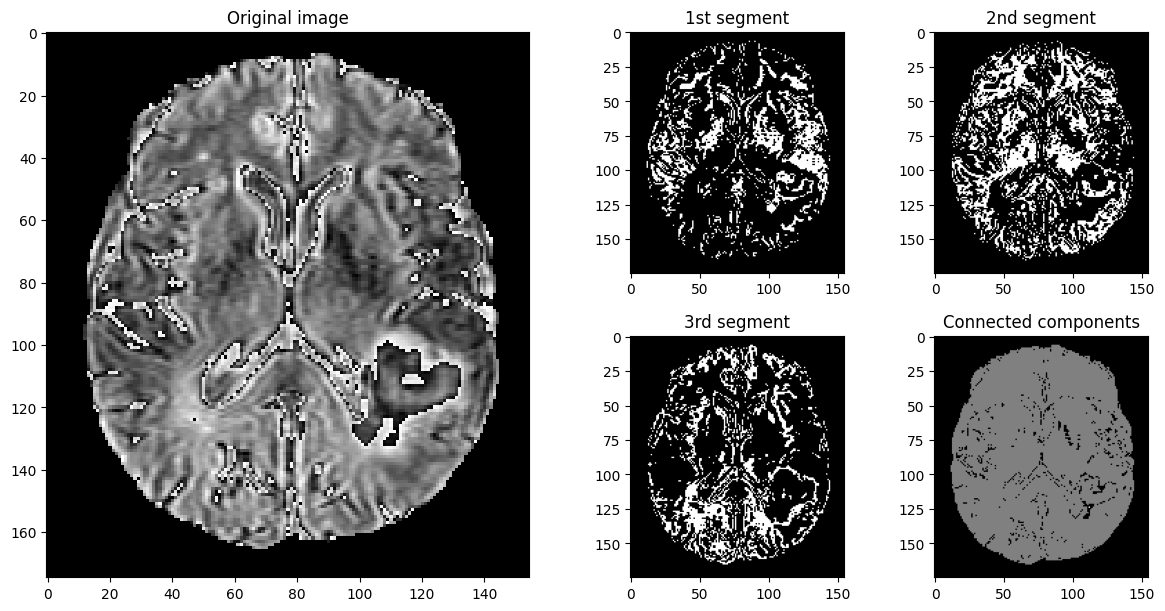

label array: [1, 2]

Labels: 2
Pixels: 16017
max label: 1


connected components: itk::simple::BinaryFillholeImageFilter
  FullyConnected: 0
  ForegroundValue: 1
  Debug: 0
  NumberOfThreads: 8
  NumberOfWorkUnits: 0
  Commands: (none)
  ProgressMeasurement: 1
  ActiveProcess: (none)



connected components: (175, 155)


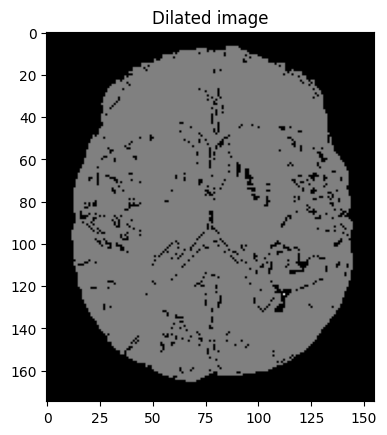

In [7]:
flair_path = "MRI_images/Flair.mha"
groundTruth_path = "MRI_images/Mask.mha"
flair_img = sitk.ReadImage(flair_path, sitk.sitkUInt8)
groundTruth_img = sitk.ReadImage(groundTruth_path, sitk.sitkUInt8)

otsu_multi = sitk.OtsuMultipleThresholds(flair_img, numberOfHistogramBins=64, numberOfThresholds=4)
show_segments(flair_img, otsu_multi)


def select_tumor(img_segmented):

    componentsFilter = sitk.ConnectedComponentImageFilter()
    componentsFilter.FullyConnectedOn()
    connectedComponents = componentsFilter.Execute(img_segmented)
    # print(f"\n\nconnected components: {sitk.GetArrayFromImage(connectedComponents).shape}\nConnected component 1: {connectedComponents[1]}")
    show_image(connectedComponents, "Connected components")

    labelStatistics = sitk.LabelShapeStatisticsImageFilter()
    labelStatistics.Execute(connectedComponents)
    nrLabels = labelStatistics.GetNumberOfLabels()
    labelArr = [label for label in range(1, nrLabels + 1)]
    print(f"label array: {labelArr}")
    

    maxLabel = labelArr.index(max(labelArr))
    nrPixels = labelStatistics.GetNumberOfPixels(maxLabel)
    print(f"\nLabels: {nrLabels}\nPixels: {nrPixels}\nmax label: {maxLabel}")

    # fill Hole
    fillHole = sitk.BinaryFillholeImageFilter()
    fillHole.SetForegroundValue(1)
    fillHole.Execute(connectedComponents)
    print(f"\n\nconnected components: {fillHole}")
    # show_image(fillHole, "Fill hole")
    
    # dilating image
    dilated_img = sitk.BinaryDilateImageFilter()
    dilated_img.SetKernelType(sitk.sitkBall)
    dilated_img.Execute(connectedComponents)
    print(f"\n\nconnected components: {sitk.GetArrayFromImage(connectedComponents).shape}")
    show_image(connectedComponents, "Dilated image")
    

    return

select_tumor(otsu_multi)

## 1.2 Region growing

Region-growing algorithms start by defining an initial region, a seed point, usually set by a user inside the object to be segmented. Afterwards, an iterative search is performed. In each iteration, all neighboring pixels of the seed are evaluated, and a criterion is used to determine if they should also be considered part of the object. If so, they are added to the region, and their neighbors will be evaluated in the following iteration.

The criterion to add neighbors varies between applications; these could depend on the brightness, color, texture, gradient, or geometric properties. The most common approach is to consider the intensity of the neighboring pixels. If the intensity values are between specific lower and upper threshold values, they are included within the region. This algorithm has the benefit of considering spatial connectivity, thereby limiting the segmentation to connected regions.

<img src="./images/region_growing.png" alt="drawing" width="800"/>

**(i)** Angio-MRI with seed point at the aortic arch **(ii) - (v)** Region growing from the seed point.

## Exercise 2.1 

You noticed from the previous exercises that it was impossible to directly separate the tumor from other structures, hence the need to isolate it using sitk.ConnectedComponentImageFilter(). In this exercise, you will attempt to isolate the tumor by implementing a region-growing algorithm in its simplest form.

The algorithm should output a binary image with pixel values equal to 1 for the structure under study and 0 for all other pixels. It should use a seed point and two threshold values (lower and upper) as inputs.

1. Start by reading the image 'Flair.mha' and the ground-truth segmentation 'Mask.mha' from the folder 'MRI_images', read the ground truth as 'sitk.sitkUInt8'.
2. Use the function ```set_seed_point()``` to visualize the image and select a seed point. Select a point in the center of the tumor.
3. The previous function returns the coordinates of the seed point. Get the pixel intensity at the seed point. 
4. Build a function that implements a region-growing algorithm. This algorithm has to compare the intensity of the seed point with the neighboring intensities. The pixels are added to the region if they are within the limits. Evaluate the performance of the algorithm using following threshold values:

    - Seed point intensity $\pm$30, $\pm$60, and $\pm$90. 

5. Assess its performance by considering 4 and 8 nearest neighbors. 

    **To build the algorithm:**
    - Start from the seed point. If the provided function does not work, employ as seed point: (114, 117)
    - List the 4 (or 8) neighboring pixels
    - Check if their intensity falls within the threshold boundaries. 
    - Grow your region by adding the pixels that meet the condition.
    - List all new neighboring pixels of the obtained new region.
    - Repeat until there are no more pixels added.
    
**Hint:** It may be handy to store the indexes (locations) and values of pixels already marked inside and those currently marked as neighbors. For example: 0 - outside, 1 - inside, 2 - neighbor.

6. Since you will be working with an array, convert the result to a SimpleITK image and use ```sitk.CopyInformation()``` to copy the metadata from the original image.
7. Apply a post-processing stage of your choice to the resultant segmentations obtained using the threshold of $\pm$90.
8. Calculate the metrics (DICE coefficient, Jaccard coefficient, false positive error, false negative error, and Hausdorff distance) between the ground truth and the obtained segmentations.

## Report
<font color=blue>

- Plot a two-by-five image comparison of the ground truth and the tumor segmentations at each threshold level for each number of neighbors.
- Plot a relation (```plt.plot()```) between the number of thresholds used (x-axis) against the evaluated metric. On each figure include two plots, one for the 4-neighbors case, and another for the 8-neighbors case.
- In the clinical practice, you are often faced with a trade-off between the false positive and false negative error of your segmentation (one is low, the other is high). In the case of brain tumor segmentation, would you prefer to obtain:
    - oversegmenated or undersegmented volume?
    - Why? Which case corresponds to what values of false positive and false negative errors?
    
</font>

<font color=blue> Your answer here </font>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__version__)


# Function to show a new image which is in sitk format
def show_image(image, title):
    '''
    This function conver a sitk image, converts it to array and shows it
    Inputs:
        - image: Image in SimpleITK format that will be plot
    Outputs:
        - A new plot
    '''
    array = sitk.GetArrayFromImage(image)
    
    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()
    

# Function to select a seed point from the image
def set_seed_point(image):
    '''
    This function opens a new window and displays the image, select a point inside the tumor to set the seed point.
    Inputs:
        - image: Image where the seed point will be set. Format sitk.
    Outputs:
        - seed: 'x' and 'y' coordinates of the seed point
    '''
    matplotlib.use('TkAgg')
    
    # Pass image to array
    array = sitk.GetArrayFromImage(image)
    
    # Select seed point
    plt.figure()
    plt.imshow(array, cmap = 'gray')
    plt.show(block=False)
    #User selects the intial seed point
    print ('\nPlease select the initial seed point')

    pseed = plt.ginput(1)
    x = int(pseed[0][0])
    y = int(pseed[0][1])
    seed = x, y

    print ('you clicked:',seed)

    # Close figure
    plt.close('all')
    
    return seed

In [ ]:
# your code here